In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('Coffee_Shop_Sales.xlsx')
df.head(3)

transaction_id transaction_date transaction_time  transaction_qty  \
0               1       2023-01-01         07:06:11                2   
1               2       2023-01-01         07:08:56                2   
2               3       2023-01-01         07:14:04                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  Lower Manhattan          32         3.0              Coffee   
1         5  Lower Manhattan          57         3.1                 Tea   
2         5  Lower Manhattan          59         4.5  Drinking Chocolate   

            product_type            product_detail  
0  Gourmet brewed coffee               Ethiopia Rg  
1        Brewed Chai tea  Spicy Eye Opener Chai Lg  
2          Hot chocolate         Dark chocolate Lg

In [32]:
#for missing values
print(df.isnull().sum())

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64


In [33]:
duplicateRows = df[df.duplicated()]
duplicateRows

Empty DataFrame
Columns: [transaction_id, transaction_date, transaction_time, transaction_qty, store_id, store_location, product_id, unit_price, product_category, product_type, product_detail]
Index: []

In [34]:
df.duplicated().sum()

0

In [35]:
df.describe().T

count                           mean  \
transaction_id    149116.0                   74737.371872   
transaction_date    149116  2023-04-15 11:50:32.173609984   
transaction_qty   149116.0                       1.438276   
store_id          149116.0                       5.342063   
product_id        149116.0                      47.918607   
unit_price        149116.0                       3.382219   

                                  min                  25%  \
transaction_id                    1.0             37335.75   
transaction_date  2023-01-01 00:00:00  2023-03-06 00:00:00   
transaction_qty                   1.0                  1.0   
store_id                          3.0                  3.0   
product_id                        1.0                 33.0   
unit_price                        0.8                  2.5   

                                  50%                  75%  \
transaction_id                74727.5            112094.25   
transaction_date  2023-04-24 00:00:00  2023-05-30 00:00:00   
transaction_qty                   1.0                  2.0   
store_id                          5.0                  8.0   
product_id                       47.0                 60.0   
unit_price                        3.0                 3.75   

                                  max           std  
transaction_id               149456.0  43153.600016  
transaction_date  2023-06-30 00:00:00           NaN  
transaction_qty                   8.0      0.542509  
store_id                          8.0      2.074241  
product_id                       87.0      17.93002  
unit_price                       45.0      2.658723

In [36]:
df.columns

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail'],
      dtype='object')

In [37]:
print(df.dtypes)


transaction_id               int64
transaction_date    datetime64[ns]
transaction_time            object
transaction_qty              int64
store_id                     int64
store_location              object
product_id                   int64
unit_price                 float64
product_category            object
product_type                object
product_detail              object
dtype: object


In [38]:
df['transaction_time'] = df['transaction_time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)

In [39]:
df['transaction_time'] = df['transaction_time'].astype(float)


In [40]:
import pandas as pd

df = pd.read_excel('Coffee_Shop_Sales.xlsx')
print(df['store_location'].unique())
df['store_location'] = pd.to_numeric(df['store_location'], errors='coerce')
df['store_location'] = df['store_location'].astype(float)

print(df['product_category'].unique())
df['product_category'] = pd.to_numeric(df['product_category'], errors='coerce')
df['product_category'] = df['product_category'].astype(float)

print(df['product_type'].unique())
df['product_type'] = pd.to_numeric(df['product_type'], errors='coerce')
df['product_type'] = df['product_type'].astype(float)

print(df['product_detail'].unique())
df['product_detail'] = pd.to_numeric(df['product_detail'], errors='coerce')
df['product_detail'] = df['product_detail'].astype(float)



['Lower Manhattan' "Hell's Kitchen" 'Astoria']
['Coffee' 'Tea' 'Drinking Chocolate' 'Bakery' 'Flavours' 'Loose Tea'
 'Coffee beans' 'Packaged Chocolate' 'Branded']
['Gourmet brewed coffee' 'Brewed Chai tea' 'Hot chocolate' 'Drip coffee'
 'Scone' 'Barista Espresso' 'Brewed Black tea' 'Brewed Green tea'
 'Brewed herbal tea' 'Biscotti' 'Pastry' 'Organic brewed coffee'
 'Premium brewed coffee' 'Regular syrup' 'Herbal tea' 'Gourmet Beans'
 'Organic Beans' 'Sugar free syrup' 'Drinking Chocolate' 'Premium Beans'
 'Chai tea' 'Green beans' 'Espresso Beans' 'Green tea' 'Organic Chocolate'
 'Housewares' 'Black tea' 'House blend Beans' 'Clothing']
['Ethiopia Rg' 'Spicy Eye Opener Chai Lg' 'Dark chocolate Lg'
 'Our Old Time Diner Blend Sm' 'Oatmeal Scone' 'Columbian Medium Roast Sm'
 'Latte Rg' 'Dark chocolate Rg' 'Spicy Eye Opener Chai Rg' 'Ethiopia Lg'
 'Earl Grey Lg' 'Ouro Brasileiro shot' 'Serenity Green Tea Lg'
 'Jumbo Savory Scone' 'Lemon Grass Rg' 'Sustainably Grown Organic Lg'
 'Hazelnut Bi

In [41]:
print(df.dtypes)

transaction_id               int64
transaction_date    datetime64[ns]
transaction_time            object
transaction_qty              int64
store_id                     int64
store_location             float64
product_id                   int64
unit_price                 float64
product_category           float64
product_type               float64
product_detail             float64
dtype: object


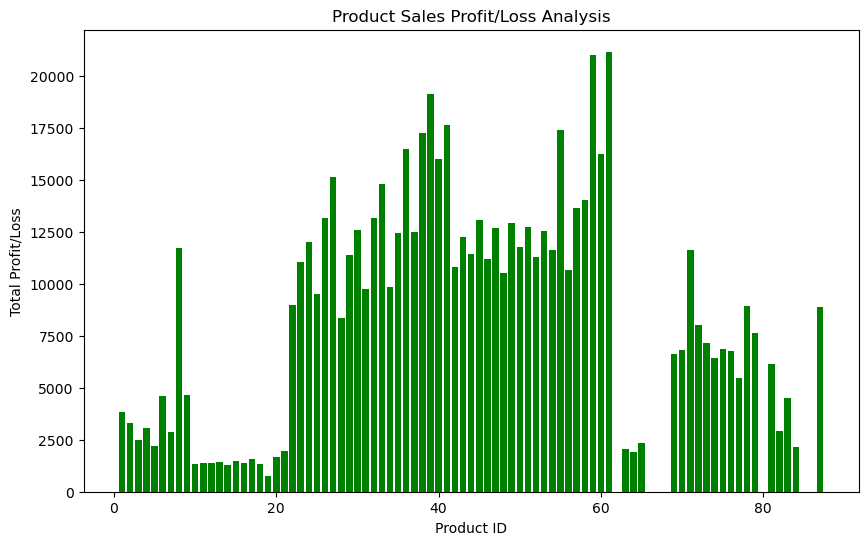

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data

df = pd.read_excel('Coffee_Shop_Sales.xlsx')

# Calculate profit/loss for each transaction
df['profit_loss'] = df['transaction_qty'] * df['unit_price']

# Aggregate data to compare product sales
product_sales = df.groupby('product_id')['profit_loss'].sum().reset_index()

# Identify products generating profit and those incurring losses
product_sales['status'] = product_sales['profit_loss'].apply(lambda x: 'Profit' if x > 0 else 'Loss')

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(product_sales['product_id'], product_sales['profit_loss'], color=product_sales['status'].map({'Profit': 'green', 'Loss': 'red'}))
plt.xlabel('Product ID')
plt.ylabel('Total Profit/Loss')
plt.title('Product Sales Profit/Loss Analysis')
plt.show()


#  Profit Increase Prediction

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
df = pd.read_excel('Coffee_Shop_Sales.xlsx')
df['profit_loss'] = df['transaction_qty'] * df['unit_price']
X = df[['transaction_qty', 'unit_price']] 
y = df['profit_loss'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

future_profits = model.predict(X_test)


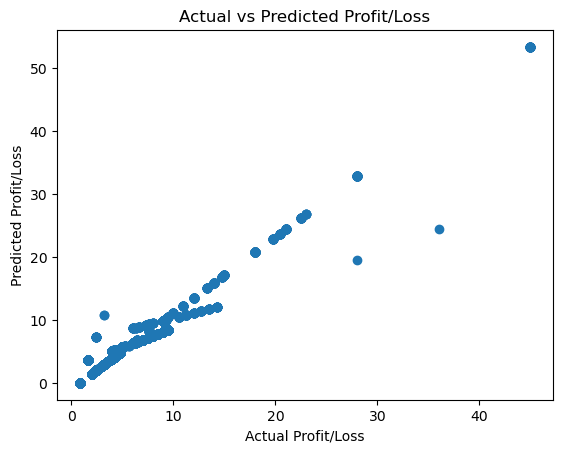

In [45]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.scatter(y_test, future_profits)
plt.xlabel('Actual Profit/Loss')
plt.ylabel('Predicted Profit/Loss')
plt.title('Actual vs Predicted Profit/Loss')
plt.show()


In [46]:
import pandas as pd
from datetime import time
import seaborn as sns
import matplotlib.pyplot as plt

print(df['store_location'].unique())

df['store_location'] = pd.to_numeric(df['store_location'], errors='coerce')
df['store_location'] = df['store_location'].astype(float)

print(df)

print(df['product_detail'].unique())

df['product_detail'] = pd.to_numeric(df['product_detail'], errors='coerce')

df['product_detail'] = df['product_detail'].astype(float)

print(df)



['Lower Manhattan' "Hell's Kitchen" 'Astoria']
        transaction_id transaction_date transaction_time  transaction_qty  \
0                    1       2023-01-01         07:06:11                2   
1                    2       2023-01-01         07:08:56                2   
2                    3       2023-01-01         07:14:04                2   
3                    4       2023-01-01         07:20:24                1   
4                    5       2023-01-01         07:22:41                2   
...                ...              ...              ...              ...   
149111          149452       2023-06-30         20:18:41                2   
149112          149453       2023-06-30         20:25:10                2   
149113          149454       2023-06-30         20:31:34                1   
149114          149455       2023-06-30         20:57:19                1   
149115          149456       2023-06-30         20:57:19                2   

        store_id  store_loca

In [47]:
top_products = product_sales.sort_values(by='profit_loss', ascending=False).head(10)
print(top_products)


    product_id  profit_loss  status
60          61     21151.75  Profit
58          59     21006.00  Profit
38          39     19112.25  Profit
40          41     17641.75  Profit
54          55     17384.00  Profit
37          38     17257.50  Profit
35          36     16481.25  Profit
59          60     16233.75  Profit
39          40     15997.50  Profit
26          27     15109.50  Profit


# 4. Loss Mitigation

In [49]:
loss_products = product_sales[product_sales['profit_loss'] < 0]
print(loss_products)


Empty DataFrame
Columns: [product_id, profit_loss, status]
Index: []


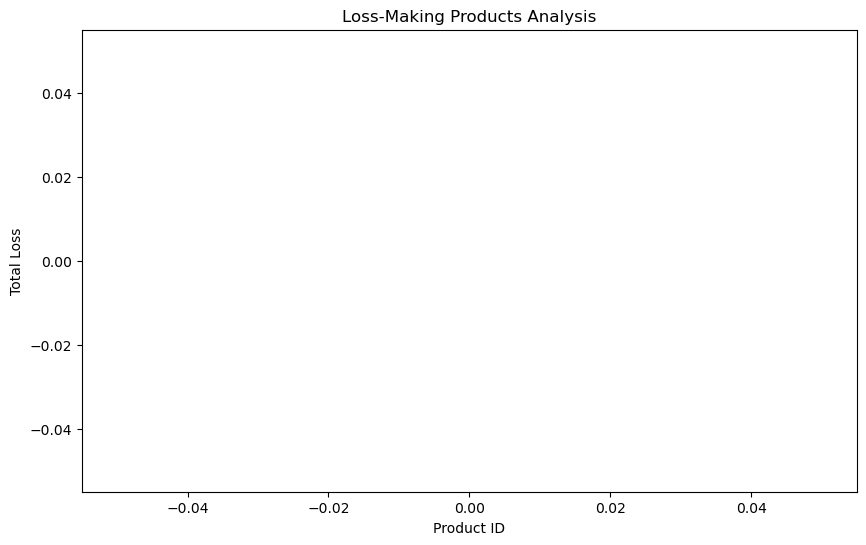

In [50]:
plt.figure(figsize=(10, 6))
plt.bar(loss_products['product_id'], loss_products['profit_loss'], color='red')
plt.xlabel('Product ID')
plt.ylabel('Total Loss')
plt.title('Loss-Making Products Analysis')
plt.show()


Empty DataFrame
Columns: [product_id, profit_loss, status]
Index: []
product_id       int64
profit_loss    float64
status          object
dtype: object
Empty DataFrame
Columns: [product_id, profit_loss, status]
Index: []


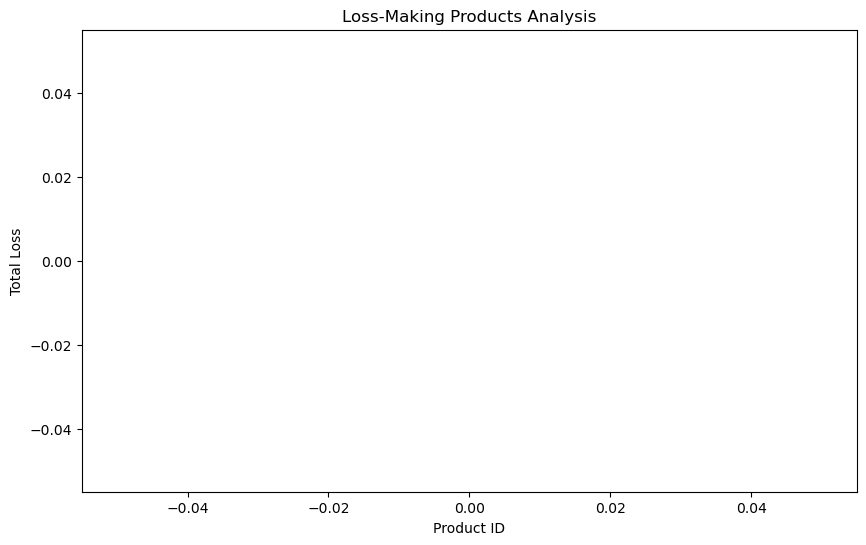

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
print(loss_products)
print(loss_products.dtypes)
print(loss_products[loss_products['profit_loss'] < 0])

plt.figure(figsize=(10, 6))
plt.bar(loss_products['product_id'], loss_products['profit_loss'], color='red')
plt.xlabel('Product ID')
plt.ylabel('Total Loss')
plt.title('Loss-Making Products Analysis')
plt.show()
